# Links to all the seperate and intermediate Colabs we worked on:

Please note that this Colab is where we got the final results of our model. Listed below are different iterations of the project, often belonging to different members so we could work without fear of overwriting someone else's code

Original Copy: https://colab.research.google.com/drive/1ZigJotxvsW9PB5rBPzMkKf2zgKZQ3xRS?usp=sharing



Confusion Matrix Attempts:
1. [confusion_matrix](https://colab.research.google.com/drive/1dyzve5omMu0z05ylIzUuqNfRQQOLdSdP?usp=sharing)
2. [confusion_matrix_v2](https://colab.research.google.com/drive/10xtEU9OWV4V5ARnAIL75p2N-eDJ07MAa?usp=sharing)

Training:
1. [training_platform_1](https://colab.research.google.com/drive/1UqNYchU-WtCItR06Odtc68ZmOIoDif6x?usp=sharing) 
2. [training_platform_2_with_demo_attempts](https://colab.research.google.com/drive/1Ht8lEn0LUjNCH7vXSEBHNEBv9Z_03zN9?usp=sharing)
3. [training_platform_3_with_demo_attempts](https://colab.research.google.com/drive/1LPYdVwDYMMyHdW7JO4lVIomnlIuYj2Yt?usp=sharing)
4. [training_platform_4_with_demo](https://colab.research.google.com/drive/1-GtvVTXlmVwweYL67oiNfM1NmKPQDvxr)
5. [main_colab_before_final](https://colab.research.google.com/drive/1A15lj46BAJ1R2PO6wJuPJjz71n19BqeA) 

Other:
1. [BERT_attempt](https://colab.research.google.com/drive/1duhbaONWsy8S1nsYFCpxMgKIL7w6J54G?usp=sharing) 
2. [CNN_attempt](https://colab.research.google.com/drive/1LN0778TrNOW7gu_AwL1rgBEe93a0dypV#scrollTo=KiIPVoSSKVYU)

References:

[Medium Sentiment Analysis Tutorial](https://medium.com/@sonicboom8/sentiment-analysis-torchtext-55fb57b1fab8)

[Medium Sentiment Analysis Tutorial Code](https://gist.github.com/SETIADEEPANSHU/78affffb4f82c3d2a5965a1c294b5211)

[Explaination on tqdm progress bars in python](https://stackoverflow.com/questions/42212810/tqdm-in-jupyter-notebook-prints-new-progress-bars-repeatedly)



In [ ]:
# mount drive
# NOTE: all users should have the path below and must mount this drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading

 ## Load data and create torchtext dataset

Load in our dataset. This step will take 1-3 mins.

In [ ]:
import torchtext
from torchtext.legacy import data
import  spacy
import re # RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

# tokenizer function using spacy
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])

def tokenizer(s): 
    return [w.text.lower() for w in nlp(text_clean(s))]

def text_clean(text):
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric character
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
    return text.strip()


# define the columns that we want to process and how to process
text_field = data.Field(sequential=True, 
                       tokenize=tokenizer,  
                       include_lengths=True, 
                       use_vocab=True)
label_field = data.Field(sequential=False, 
                         use_vocab=False, 
                         pad_token=None, 
                         unk_token=None)


# train_val_fields = [
#     ('ItemID', None), # we dont need this, so no processing
#     ('Sentiment', label_field), # process it as label
#     ('SentimentSource', None), # we dont need this, so no processing
#     ('SentimentText', txt_field) # process it as text
# ]

fields = [
        ('title', None), 
        ('text', text_field), 
        ('label', label_field)]

# trainds, valds = data.TabularDataset. 
#                                             skip_header=True)






In [ ]:
dataset = torchtext.legacy.data.TabularDataset("/content/drive/MyDrive/APS360_group/df_4000_kaggle_small.csv", # name of the file
                                        "csv",              #format of the files that will be loaded and processed   
                                        fields,             #Tell torchtext how the coming data will be processed
                                        skip_header=True)  # skip first line 




In [ ]:
print(len(dataset))


4009


In [ ]:
dataset[1].label == '1'

False

Run once.

In [ ]:
# remove empty sentences and rows with no labels!
length = len(dataset)
i = 0;
while i < length:
    if (dataset[i].label != '1' and dataset[i].label != '0') or dataset[i].text == '' or len(dataset[i].text) == 0 or len(dataset[i].label) ==0: 
        # print("empty label or text")
        # print(dataset[i].text)
        # print(dataset[i].label)
        del dataset.examples[i] 
        i =0;
    else: 
        i +=1
    length = len(dataset)


print(len(dataset))
# # just a check to make sure all invalid entries have been removes
# for i in length:
#     if (dataset[i].label != '1' and dataset[i].label != '0') or dataset[i].text == '': # 
#         print("empty label or text")
#         print(dataset[i].text)
#         print(dataset[i].label) 
# dataset = [sentence for sentence in dataset if len(sentence) > 0]

train, valid, test = dataset.split(split_ratio=[0.6,0.2,0.2])

3988


In [ ]:
length = len(train)
i =0
while i < 10:
    if i <10:
        print(train[i].text)
        print(train[i].label)
        i +=1


['washington', 'reuters', 'the', 'tax', 'overhaul', 'pushed', 'by', 'president', 'donald', 'trump', 'and', 'fellow', 'republicans', 'is', 'prompting', 'a', 'slew', 'of', 'attack', 'ads', 'by', 'democrats', 'and', 'progressive', 'groups', 'that', 'say', 'the', 'legislation', 'would', 'lavish', 'benefits', 'on', 'corporations', 'and', 'the', 'rich', 'while', 'harming', 'the', 'middle', 'class', 'one', 'ad', 'launched', 'on', 'tuesday', 'warns', 'that', 'the', 'republican', 'tax', 'plan', 'would', 'leave', 'maine', 'residents', 'lost', 'in', 'the', 'wilderness', 'as', 'it', 'pans', 'through', 'a', 'dark', 'deserted', 'forest', 'the', 'television', 'spot', 'paid', 'for', 'by', 'the', 'group', 'not', 'one', 'penny', 'urges', 'the', 'state', 's', 'republican', 'senator', 'susan', 'collins', 'who', 'is', 'undecided', 'on', 'the', 'plan', 'and', 'whose', 'vote', 'could', 'help', 'decide', 'its', 'fate', 'in', 'the', 'senate', 'not', 'to', 'lose', 'her', 'way', 'another', 'not', 'one', 'penny',

For text data column, we use the following:

`tokenize=tokenizer`

> This attribute takes a function that will tokenize a given text. In this case the function will tokenize a single tweet. You can also pass 'spacy' string in this attribute if spacy is installed.

'sequential=True'

> It tell torchtext that the data is in form of sequence and not discrete

`'include_lengths=True'`
> Apart from tokenized text we will also need the lengths of the tweets for RNN

`'use_vocab=True'`

> Since this is used to process the text data, we need to create the vocabulary of unique words. This attribute tells torchtext to create the vocabulary

For the label column, we use the following: 
'sequential=False'
> Now we are defining the blueprint of label columns. Labels are not sequential data, they are discrete. So this attribute is false
                                    
'use_vocab=False'
> Since it is a binary classification problem and labels are already numericalized, we will set this to false

` 'pad_token=None'
'unk_token=None' `
> We don't need padding and out of vocabulary tokens for labels.

Take a look at our dataset


In [ ]:
print(type(train))
# torchtext.data.dataset.TabularDataset
# train.fields.items()

print(len(train))
print(len(valid))
print(len(test))
# 29329
# 9776
# 9776

print( train[1].text )
print( train[1].label )

<class 'torchtext.legacy.data.dataset.Dataset'>
2393
797
798
['chat', 'with', 'us', 'in', 'facebook', 'messenger', 'find', 'out', 'what', 's', 'happening', 'in', 'the', 'world', 'as', 'it', 'unfolds']
1


## Load pretrained word vectors and building vocabulary

In [ ]:
from torchtext import vocab

# # specify the path to the localy saved vectors
# vec = vocab.Vectors('glove.twitter.27B.100d.txt', './data/glove_embedding/')

# Loading the embedding will take 3-5 mins (My internet is slow with a 4.19MB/s download speed). The file is 1.52GB
vec = torchtext.vocab.GloVe(name="twitter.27B", dim=100, max_vectors=100000) # use 10k most common words


.vector_cache/glove.twitter.27B.zip: 1.52GB [04:47, 5.28MB/s]                            
 99%|█████████▉| 99284/100000 [00:04<00:00, 19889.00it/s]


In [ ]:
# build the vocabulary using train and validation dataset and assign the vectors
# define max number of unique words as 100000. Words which are not in vocabulary will be assigned <unk> token. 
text_field.build_vocab(train, valid, max_size=100000, vectors=vec)

# build vocab for labels
label_field.build_vocab(train)

print(text_field.vocab.vectors.shape)
# torch.Size([100002, 100])

text_field.vocab.vectors[text_field.vocab.stoi['the']]


torch.Size([42468, 100])


tensor([ 9.5152e-02,  3.7024e-01,  5.4291e-01,  1.9621e-01,  4.8205e-02,
         3.2033e-01, -5.9638e-01,  1.5868e-02, -1.2989e-01, -6.3028e-01,
         8.1944e-02,  2.4164e-01, -6.0990e+00, -6.8557e-01,  5.0354e-01,
        -3.4089e-02,  1.1705e-01, -7.7403e-03, -8.6512e-02,  4.3617e-01,
        -4.3982e-01,  2.6125e-01, -4.0348e-02, -1.9194e-01,  8.3204e-02,
        -5.8246e-01, -3.1923e-02,  1.2630e-01,  4.0120e-01,  6.8906e-02,
        -1.0517e-01, -2.0804e-01, -4.2554e-01,  4.7799e-01,  3.4651e-01,
         2.4057e-01,  5.0244e-02, -7.2587e-02, -2.4347e-03, -5.0342e-01,
        -1.0601e+00, -3.1586e-01, -3.2457e-02, -7.6317e-02,  7.9045e-01,
         8.6367e-02, -1.9632e-01,  5.7566e-02,  8.4129e-01, -4.2020e-01,
        -1.1335e-03, -8.5632e-02,  6.1910e-02,  2.1423e-01, -1.0356e-01,
        -3.6946e-02, -2.6005e-01, -3.5657e-01,  5.4321e-02,  3.0875e-02,
         1.4092e-01, -9.1998e-02, -4.1841e-01, -3.1135e-01, -1.4937e-01,
        -2.2699e-04, -3.3454e-01, -1.4848e-01, -1.1

In [ ]:
import torch

##### Function to save text.vocab used for training in a textfile, because if we want to load the model layer and use it on an instance of text, we'll need it. We will also need the pretrained_vectors from the text.vocab.vectors!

input: 
* text.vocab, text.vocab.vectors ( note text.vocab == train.fields['text'].vocab.vectors == text_field.vocab)

outpt: 
* vocabulary_pretrained_vectors.pt (tensor), vocabulary_pretrained.txt (just a mapping from index to the word in the vocabulary)

In [ ]:
# save_pretrained_vectors(vocabulary_pretrained_vectors):   
# Save to file
torch.save(train.fields['text'].vocab.vectors, 'vocabulary_pretrained_vectors.pt')

# Function to save vocab used for training in a textfile, because if we want to load the model layer and use it on an instance of text, we'll need it.:def save_vocab(vocab, path):
# Use this by passing TEXT.vocab to it.
def save_vocab(vocab, path):   
    with open(path, 'w+') as f:     
        for token, index in vocab.stoi.items():
            f.write(f'{index}\t{token}\n')

# # Okay saved (should output to mounted drive), text_field.vocab == train.fields['text'].vocab
save_vocab(train.fields['text'].vocab, "vocabulary_pretrained.txt")

# print(type(train.fields['text'].vocab.vectors))

## Loading the data in batches

For data with variable length sentences torchtext provides BucketIterator() dataloader which is wrapper around pytorch Dataloader. BucketIterator provides some additional benefits like sorting the data according to length of the text and group together similar length text in a batch. This helps reduce the amount of padding required. Note that I have not fixed the text to any particular length. BucketIterator pads the batch according the maximum length sample.


In [ ]:
batch_size= 32 # change this to change all batch sizes

In [ ]:
train_iter, valid_iter = data.BucketIterator.splits(datasets=(train, valid), # specify train and validation Tabulardataset
                                            batch_sizes=(batch_size,batch_size),  # batch size of train and validation
                                            sort_key=lambda x: len(x.text), # on what attribute the text should be sorted
                                            device=None, # -1 mean cpu and 0 or None mean gpu
                                            sort_within_batch=True, 
                                            repeat=False)

   
test_iter = torchtext.legacy.data.BucketIterator(test,
                                           batch_size=batch_size,
                                           sort_key=lambda x: len(x.text), # to minimize padding
                                           sort_within_batch=False,        # sort within each batch
                                           repeat=False)                 # repeat the iterator for many epochs

Note: BucketIterator returns a Batch object instead of text index and labels. Also Batch object is not iterable like pytorch Dataloader. A single Batch object contains the data of one batch .The text and labels can be accessed via column names.

In [ ]:
class BatchGenerator:
    def __init__(self, dl, x_field, y_field):
        self.dl, self.x_field, self.y_field = dl, x_field, y_field
        
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            X = getattr(batch, self.x_field)
            y = getattr(batch, self.y_field)
            yield (X,y)
    

In [ ]:
train_batch_it = BatchGenerator(train_iter, 'text', 'label') # use the wrapper to convert Batch to data
val_batch_it = BatchGenerator(valid_iter, 'text', 'label')
test_batch_it = BatchGenerator(test_iter, 'text', 'label') 


In [ ]:
print(next(iter(train_batch_it)))


((tensor([[ 1342,    68,     2,  ...,    20,   345,   162],
        [ 1605,    13,   223,  ...,   970,    10,   424],
        [ 4498,     8,   188,  ..., 17991,   229,   915],
        ...,
        [ 4498,     2,     1,  ...,     1,     1,     1],
        [  247,  2204,     1,  ...,     1,     1,     1],
        [ 1712,     1,     1,  ...,     1,     1,     1]]), tensor([1320, 1319, 1316, 1312, 1312, 1310, 1308, 1305, 1305, 1302, 1298, 1298,
        1295, 1294, 1293, 1290, 1289, 1289, 1286, 1282, 1280, 1277, 1276, 1276,
        1274, 1273, 1269, 1265, 1262, 1262, 1258, 1257])), tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1]))


### print() statements for understanding what the different data types hold

convert index to string


In [ ]:
print(len(train_iter), len(valid_iter), len(test_iter))
# 918 306 306

batch = next(iter(train_iter)) # BucketIterator return a batch object
print(type(batch))
# <class 'torchtext.legacy.data.batch.Batch'>

# torchtext.data.batch.Batch

print(batch.label) # labels of the batch
# tensor([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

print(batch.text) # text index and length of the batch
# (tensor([[   26, 93780,   123,  ...,   111,   111,  2942],
        # [   12, 58610,    73,  ...,    69,    69,    69],
        # [27723,    12,  2289,  ...,   123,     2,    13],
        # ...,
        # [   40,     1,     1,  ...,     1,     1,     1],
        # [   91,     1,     1,  ...,     1,     1,     1],
        # [  328,     1,     1,  ...,     1,     1,     1]]), tensor([922, 919, 917, 917, 916, 913, 911, 911, 910, 909, 908, 907, 907, 906,
        # 902, 902, 901, 900, 898, 898, 897, 893, 889, 887, 886, 886, 885, 883,
        # 882, 881, 878, 875]))

print(batch.dataset.fields)
# {'title': None, 'text': <torchtext.legacy.data.field.Field object at 0x7f981e25c610>, 'label': <torchtext.legacy.data.field.Field object at 0x7f981e25c4d0>}
print(text_field.vocab.itos[1])

75 25 25
<class 'torchtext.legacy.data.batch.Batch'>
tensor([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0])
(tensor([[    2,     2,   416,  ...,    20,   671,  6383],
        [ 1867,  1867, 34595,  ...,  1046,   206, 11989],
        [ 2356,  2356,     4,  ...,  2226,    49,  1567],
        ...,
        [10369, 10369,   830,  ...,     1,     1,     1],
        [  729,   729,     1,  ...,     1,     1,     1],
        [  140,   140,     1,  ...,     1,     1,     1]]), tensor([895, 895, 893, 893, 890, 890, 890, 890, 888, 888, 886, 886, 886, 886,
        883, 881, 876, 873, 873, 871, 869, 869, 868, 867, 867, 866, 866, 866,
        865, 865, 863, 860]))
{'title': None, 'text': <torchtext.legacy.data.field.Field object at 0x7f6eeaee4190>, 'label': <torchtext.legacy.data.field.Field object at 0x7f6f0485fc50>}
<pad>


In [ ]:
def idxtosent(batch, idx):
    return ' '.join([text_field.vocab.itos[i] for i in batch.text[0][:,idx].cpu().data.numpy()])

In [ ]:
idxtosent(batch,1)

'the setting sun reflects off of the twin towers of time warner center in the manhattan borough of new york city november 22 2015 reuters rickey rogers harrisburg pa washington reuters president donald trump on wednesday told workers that they would win under his tax plan saying it would help the middle class and boost the economy though critics say it would mainly benefit corporations and the rich speaking in an airplane hangar at a pennsylvania air national guard base in harrisburg with a trailer truck behind him trump reiterated the basic points of the nine page tax cut framework he unveiled two weeks ago it s a middle class bill that s what we re thinking of that s what i want trump said i ve had rich friends of mine come up to me and say donald you re doing this tax plan we don t want anything don t give it to us give it to the middle class and that s what we re trying so hard to do he said his remarks came as new reuters ipsos polling showed that more than three quarters of ameri

In [ ]:
val_batch = next(iter(valid_iter))
val_batch.__dict__

{'batch_size': 32,
 'dataset': <torchtext.legacy.data.dataset.Dataset at 0x7f6ee7453810>,
 'fields': dict_keys(['title', 'text', 'label']),
 'input_fields': ['text', 'label'],
 'label': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 'target_fields': [],
 'text': (tensor([[ 2907,  2907,  2907,  2907,  2907,  2907,  2907,  2907,  2907,  2907,
               7,  1721,  1721,  1721,  1721,  1721,  1721,  1721,  1721,  1721,
            1721,  1721,  1721,  1721,  1721,  1721,  1721,  1721,  1721,  1721,
            1721,    68],
          [   15,    15,    15,    15,    15,    15,    15,    15,    15,    15,
               2,    11,    11,    11,    11,    11,    11,    11,    11,    11,
              11,    11,    11,    11,    11,    11,    11,    11,    11,    11,
              11,    13],
          [   79,    79,    79,    79,    79,    79,    79,    79,    79,    79,
             211,     7,     7,     7,     7,     

With the code above we can directly use it in the training loop just like pytorch Dataloader.

# The Model

### Code to save our model

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path


## Model Training Code


Parameters to tune:
* Batch size
* learning rate
* epochs (at most have done 3)
* the datasets which we use
* optimizer?? (probably not)


In [ ]:
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import accuracy_score
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange, tqdm #for train_GRU / train_GRU


In [ ]:

def train_GRU(model, train_dl, val_dl, loss_fn, epochs=3, learning_rate = 1e-3):
    num_batch = len(train_dl)
    train_acc = []
    val_acc = []
    val_loss = []
    train_loss = []
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    opt = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), learning_rate)
    for epoch in tnrange(epochs):      
        y_true_train = list()
        y_pred_train = list()
        total_loss_train = 0          
        
        t = tqdm(iter(train_dl), leave=False, total=num_batch) # tqdm lets us print a progress bar, https://stackoverflow.com/questions/42212810/tqdm-in-jupyter-notebook-prints-new-progress-bars-repeatedly
        for (X,lengths),y in t:
            t.set_description(f'Epoch {epoch}')
            lengths = lengths.cpu().numpy()

            
            opt.zero_grad()
            pred = model(X, lengths)
            loss = loss_fn(pred, y)
            loss.backward()
            opt.step()
            
            t.set_postfix(loss=loss.item())
            pred_idx = torch.max(pred, dim=1)[1]
            y_true_train += list(y.cpu().data.numpy())
            y_pred_train += list(pred_idx.cpu().data.numpy())
            total_loss_train += loss.item()
            
        train_acc.append(accuracy_score(y_true_train, y_pred_train))
        train_loss.append( total_loss_train/len(train_dl) )
        
        if val_dl:
            y_true_val = list()
            y_pred_val = list()
            total_loss_val = 0
            for (X,lengths),y in tqdm(val_dl, leave=False):
                pred = model(X, lengths.cpu().numpy())
                loss = loss_fn(pred, y)
                pred_idx = torch.max(pred, 1)[1]
                y_true_val += list(y.cpu().data.numpy())
                y_pred_val += list(pred_idx.cpu().data.numpy())
                total_loss_val += loss.item()
            val_acc.append( accuracy_score(y_true_val, y_pred_val) )
            val_loss.append( total_loss_val/len(val_dl) )
            print(f'Epoch {epoch}: train_loss: {train_loss[-1]:.4f} train_acc: {train_acc[-1]:.4f} | val_loss: {val_loss[-1]:.4f} val_acc: {val_acc[-1]:.4f}')
        else:
            print(f'Epoch {epoch}: train_loss: {train_loss[-1]:.4f} train_acc: {train_acc[-1]:.4f}')

        # save the model
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)  # batch_size defined in section 4. Loading the data in batches
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    ttl_epochs = np.arange(1, epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)


    # plotting
    plt.title("Training Loss")
    plt.plot(train_loss, label="Train")
    plt.plot(val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training vs Validation Accuracy")
    plt.plot(ttl_epochs, train_acc, label="Train")
    plt.plot(ttl_epochs, val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))

    return train_acc, val_acc, train_loss, val_loss



## Define the Model

In [ ]:
vocab_size = len(text_field.vocab)
embedding_dim = 100
n_hidden = 64
n_out = 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if device == torch.device("cuda"):
    torch.set_default_tensor_type(torch.cuda.FloatTensor)

class FakeNewsConcatPoolingGRUAdaptive(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_hidden, n_out, pretrained_vec, bidirectional=True):
        super().__init__()
        self.name = "FakeNewsConcatPoolingGRUAdaptive"
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.n_hidden = n_hidden
        self.n_out = n_out
        self.bidirectional = bidirectional
        
        self.emb = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.emb.weight.data.copy_(pretrained_vec) # load pretrained vectors
        self.emb.weight.requires_grad = False # make embedding non trainable
        self.gru = nn.GRU(self.embedding_dim, self.n_hidden, bidirectional=bidirectional)
        self.drop = nn.Dropout(p=0.15)
        if bidirectional:
            self.out = nn.Linear(self.n_hidden*2*2, self.n_out)
        else:
            self.out = nn.Linear(self.n_hidden*2, self.n_out)
        
    def forward(self, seq, lengths):
        bs = seq.size(1)
        self.h = self.init_hidden(bs)
        seq = seq.transpose(0,1)
        embs = self.emb(seq)
        embs = embs.transpose(0,1)
        embs = pack_padded_sequence(embs, lengths, enforce_sorted=False)
        gru_out, self.h = self.gru(embs, self.h)
        gru_out, lengths = pad_packed_sequence(gru_out)   
        avg_pool = F.adaptive_avg_pool1d(gru_out.permute(1,2,0),1).view(bs,-1)
        max_pool = F.adaptive_max_pool1d(gru_out.permute(1,2,0),1).view(bs,-1) 
        drop_out = self.drop(torch.cat([avg_pool,max_pool],dim=1))
        outp = self.out(drop_out)
        # since it is as classification problem, we will grab the last hidden state
        return F.log_softmax(outp, dim=-1)
    
    def init_hidden(self, batch_size): 
        if self.bidirectional:
            return torch.zeros((2,batch_size,self.n_hidden)).to(device)
        else:
            return torch.zeros((1,batch_size,self.n_hidden)).cuda().to(device)
          
# Since text sequences are of variable length, torchtext provides a BucketIterator 
# data loader, which batches similar length sequences together. The iterator also 
# provides functionalities to pad sequences automatically. We can do all it for all three at once.


In [ ]:
next(iter(train_batch_it))


((tensor([[ 1112,   263,     6,  ...,  3778,   671,  3922],
          [  751,   126,  2443,  ...,  1387,   206,  3474],
          [ 2915,  1322,   306,  ...,     7,     2,   126],
          ...,
          [ 1112, 23557,   150,  ...,     1,     1,     1],
          [  751,     1,     1,  ...,     1,     1,     1],
          [ 1567,     1,     1,  ...,     1,     1,     1]]),
  tensor([437, 435, 435, 434, 433, 433, 433, 433, 433, 432, 430, 429, 429, 429,
          428, 426, 425, 425, 424, 424, 424, 423, 423, 423, 422, 421, 420, 420,
          420, 419, 418, 417])),
 tensor([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
         0, 1, 1, 0, 0, 1, 1, 1]))

Epoch 0: train_loss: 0.6510 train_acc: 0.6440 | val_loss: 0.5787 val_acc: 0.8156


Epoch 1: train_loss: 0.5207 train_acc: 0.8429 | val_loss: 0.4356 val_acc: 0.8595


Epoch 2: train_loss: 0.3776 train_acc: 0.8847 | val_loss: 0.2943 val_acc: 0.9097


Epoch 3: train_loss: 0.2650 train_acc: 0.9148 | val_loss: 0.2112 val_acc: 0.9285


Epoch 4: train_loss: 0.1957 train_acc: 0.9336 | val_loss: 0.1685 val_acc: 0.9398


Epoch 5: train_loss: 0.1534 train_acc: 0.9515 | val_loss: 0.1597 val_acc: 0.9523


Epoch 6: train_loss: 0.1224 train_acc: 0.9570 | val_loss: 0.1296 val_acc: 0.9435


Epoch 7: train_loss: 0.1103 train_acc: 0.9666 | val_loss: 0.1060 val_acc: 0.9611


Epoch 8: train_loss: 0.0920 train_acc: 0.9678 | val_loss: 0.0910 val_acc: 0.9699


Epoch 9: train_loss: 0.0723 train_acc: 0.9766 | val_loss: 0.0867 val_acc: 0.9661


Epoch 10: train_loss: 0.0656 train_acc: 0.9820 | val_loss: 0.0783 val_acc: 0.9724


Epoch 11: train_loss: 0.0599 train_acc: 0.9808 | val_loss: 0.0745 val_acc: 0.9737


Epoch 12: train_loss: 0.0496 train_acc: 0.9833 | val_loss: 0.0906 val_acc: 0.9774


Epoch 13: train_loss: 0.0515 train_acc: 0.9841 | val_loss: 0.0743 val_acc: 0.9787


Epoch 14: train_loss: 0.0536 train_acc: 0.9866 | val_loss: 0.0663 val_acc: 0.9787

Finished Training
Total time elapsed: 23152.78 seconds


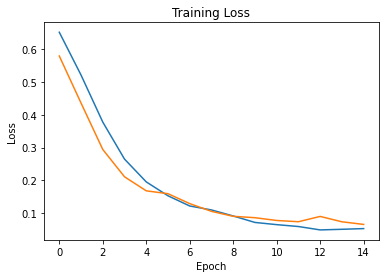

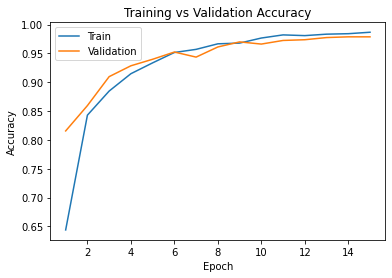

Final Training Accuracy: 0.9866276640200585
Final Validation Accuracy: 0.9786700125470514
Final Training Loss: 0.05360263725742698
Final Validation Loss: 0.06631933518219739


([0.6439615545340577,
  0.8428750522356874,
  0.8846636021730045,
  0.914751358127873,
  0.9335562055996657,
  0.951525282072712,
  0.9569577935645633,
  0.9665691600501463,
  0.9678228165482657,
  0.9765984120351023,
  0.9820309235269536,
  0.980777267028834,
  0.9832845800250731,
  0.9841203510238195,
  0.9866276640200585],
 [0.8155583437892095,
  0.8594730238393977,
  0.9096612296110415,
  0.9284818067754078,
  0.9397741530740276,
  0.9523212045169385,
  0.9435382685069009,
  0.9611041405269761,
  0.9698870765370138,
  0.9661229611041405,
  0.972396486825596,
  0.973651191969887,
  0.9774153074027604,
  0.9786700125470514,
  0.9786700125470514],
 [0.650952388048172,
  0.5207496927181879,
  0.3776484124859174,
  0.2649926208953063,
  0.1956685783714056,
  0.15337249947090945,
  0.12235773670797546,
  0.11031562404707074,
  0.09196674693686267,
  0.07232297210643689,
  0.06560687668000659,
  0.059878919987628856,
  0.04956889631149049,
  0.05145672582245121,
  0.05360263725742698],
 [

In [ ]:
m = FakeNewsConcatPoolingGRUAdaptive(vocab_size, embedding_dim, n_hidden, n_out, 
                             train.fields['text'].vocab.vectors).to(device)
# move this to its own textbox 1e-3
train_GRU(model=m, train_dl=train_batch_it, val_dl=val_batch_it,  learning_rate = 0.0005, loss_fn = F.nll_loss, epochs=15)

## Caculate the Model's Test Accuracy 

In [ ]:
#ambrose addition
from sklearn.metrics import confusion_matrix
import seaborn as sns

def get_test_accuracy(model, test_batch_it):
    y_true_test = list()
    y_pred_test = list()
    enforce_sorted=False
    for (X,lengths),y in tqdm(test_batch_it):
        pred = (m(X, lengths.cpu().numpy()))
        # print("the predval: ", pred)
        pred = torch.max(pred, 1)[1]
        # print("the new predval: ", pred)
        # print("ground truth", y)
        y_true_test += list(y.cpu().data.numpy())
        y_pred_test += list(pred.cpu().data.numpy())
    # from sklearn.metrics import accuracy_score
    # accuracy = accuracy_score(prediction, labels_test)
    
    #ambrose addition begin
    cm = confusion_matrix(y_true_test, y_pred_test, labels=[1,0])
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['REAL', 'Fake'])
    ax.yaxis.set_ticklabels(['REAL', 'Fake'])
    #ambrose addition end


    test_acc = accuracy_score(y_true_test, y_pred_test)
    return test_acc, cm



0.9837092731829574
[[371   4]
 [  9 414]]


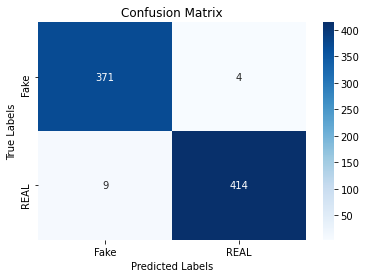

In [ ]:
test_acc, cm = get_test_accuracy(m, test_batch_it);
print(test_acc)
print(cm)

## Emily new data sample testing


In [ ]:
demo_sentence = torchtext.legacy.data.TabularDataset("/content/drive/MyDrive/APS360_group/demo_new_data/fake_left.csv", # name of the file
                                        "csv",              #format of the files that will be loaded and processed   
                                        fields,             #Tell torchtext how the coming data will be processed
                                        skip_header=True)  # skip first line 

demo_sentence_iter = torchtext.legacy.data.BucketIterator(demo_sentence,
                                           batch_size=1,
                                           sort_key=lambda x: len(x.text), # to minimize padding
                                           sort_within_batch=False,        # sort within each batch
                                           repeat=False)                 # repeat the iterator for many epochs


demo_batch_it = BatchGenerator(demo_sentence_iter, 'text', 'label') 


In [ ]:
def get_test_accuracy(model, test_batch_it):
    y_true_test = list()
    y_pred_test = list()
    enforce_sorted=False
    for (X,lengths),y in tqdm(test_batch_it):
        pred = (model(X, lengths.cpu().numpy()))
        # print("the predval: ", pred)
        pred = torch.max(pred, 1)[1]
        # print("the new predval: ", pred)
        # print("ground truth", y)
        y_true_test += list(y.cpu().data.numpy())
        y_pred_test += list(pred.cpu().data.numpy())
    # from sklearn.metrics import accuracy_score
    test_acc = accuracy_score(y_true_test, y_pred_test)
    return test_acc

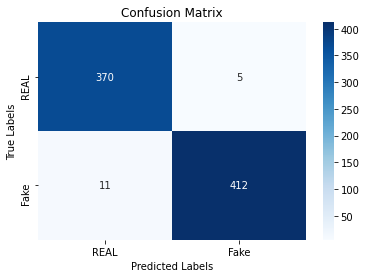

In [ ]:
test_acc = get_test_accuracy(m, test_batch_it);

In [ ]:
print(test_acc)

0.9837092731829574



(1.0, array([[8, 0],
       [0, 0]]))


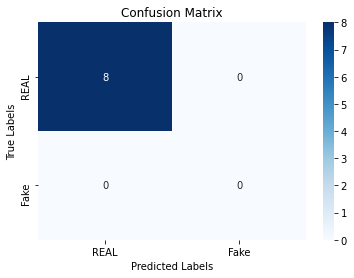

In [ ]:
demo_test_acc = get_test_accuracy(m, demo_batch_it);
print(demo_test_acc)


(0.75, array([[0, 0],
       [1, 3]]))


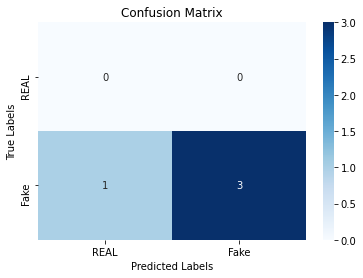

In [ ]:
demo_test_acc = get_test_accuracy(m, demo_batch_it);
print(demo_test_acc)

fake_left 2: accuracte

fake_left accuracy: 0.75

real_right accuracy: 1.0


In [ ]:
# I've been just saving the vocabulary used for training to a text file (tab separated):

def save_vocab(vocab, path):
    with open(path, 'w+') as f:     
        for token, index in vocab.stoi.items():
            f.write(f'{index}\t{token}')
# Use this by passing TEXT.vocab to it.

# Then, in the inference file, we can the vocabulary into a plain old Python dictionary:

def read_vocab(path):
    vocab = dict()
    with open(path, 'r') as f:
        for line in f:
            index, token = line.split('\t')
            vocab[token] = int(index)
    return vocab
# Then use the below function - which is similar to that in the tutorials - which takes in a string, tokenizes it with our vocab we've just loaded and outputs a prediction.

def predict_sentiment(model, sentence, vocab, unk_idx):
    """
    model is your PyTorch model
    sentence is string you wish to predict sentiment on
    vocab is dictionary, keys = tokens, values = index of token
    unk_idx is the index of the <unk> token in the vocab
    """
    tokens = tokenize(sentence) #convert string to tokens, needs to be same tokenization as training
    indexes = [vocab.get(t, unk_idx) for t in tokens] #converts to index or unk if not in vocab
    tensor = torch.LongTensor(indexes).unsqueeze(1) #convert to tensor and add batch dimension
    output = model(tensor) #get output from model
    prediction = torch.sigmoid(output) #squeeze between 0-1 range
    return prediction

## Test the Model On Individual Texts 

What do we need from training?
1. torch.save(train.fields['text'].vocab.vectors, 'vocabulary_pretrained_vectors.pt')
2. The following info from training about our network:
        * vocab_size = len(text_field.vocab)
        * embedding_dim = 100
        * n_hidden = 64
        * n_out = 2
3. The following files (5)
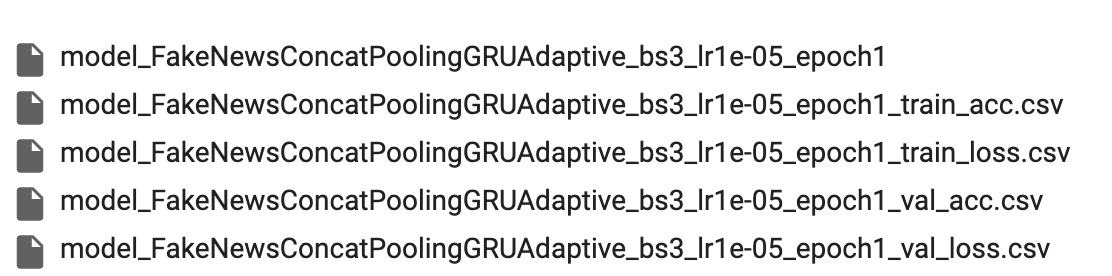

In [ ]:
import numpy as np
import torchtext
from torchtext.legacy import data
import spacy
import re # RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.

#### Loading our model


In [ ]:
# Set and load the model 
def FakeNewsGRU_load_model(model_path, vocab_size, embedding_dim, n_hidden, n_out, vocabulary_pretrained_vectors):
    model = FakeNewsConcatPoolingGRUAdaptive(vocab_size, embedding_dim, n_hidden, n_out, vocabulary_pretrained_vectors)

    #######
    # Just something we need to do
    device = torch.device("cuda" if torch.cuda.is_available() 
                                    else "cpu")
    model.to(device)
    use_cuda = False
    if torch.cuda.is_available():
        model.cuda()
    ########

    # The path to the model we are loading  ex. model_path =  "git/wavechord/SignLanguageDetectionCNN/bs32_lr0.001_epoch29/model_CNN_classifier_bs32_lr0.001_epoch29"
    # Load it in
    model.load_state_dict(torch.load(model_path) )
    # Dunno
    model.eval()
    # print our model parameters
    return (model)


Our tockenizer which makes splits in the sentences into their consituent words 

In [ ]:
# tokenizer function using spacy
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])

def tokenize(s): 
    return [w.text.lower() for w in nlp(text_clean(s))]

def text_clean(text):
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric character
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
    return text.strip()


#### Time to load the model (+ set up some of its initial parameters), import Our Text We Want to Run Our Model oN, and run predict_sentiment on it!


Read our .pt file with our vocab vectors from training. We need this for when loading our model.

In [ ]:
# Grab this info from training to init our model! We saved these vectors as torch.tensor during "Load pretrained word vectors and building vocabulary" and now will load it to demo with
vocabulary_pretrained_vectors_path ="/content/vocabulary_pretrained_vectors.pt"
vocabulary_pretrained_vectors = torch.load(vocabulary_pretrained_vectors_path)
vocab_size = print(len(vocabulary_pretrained_vectors))

# # This is will import a dictionary that maps the vocabulary (token) we trained with in train to its "token value"
# # note the struct is as follows vocabulary_pretrained["hi"] = 0 (0 means not in our dict), vocabulary_pretrained["structure"] == 2 (greater than 0 means it exists in our dict)
# vocabulary_pretrained = []
# print(len(vocabulary_pretrained))
# vocabulary_pretrained_path = "/content/vocabulary_pretrained.txt"
# vocabulary_pretrained = read_vocabulary_pretrained(vocabulary_pretrained_path)

# # print(len(vocabulary_pretrained) )
# vocab_size = len(vocabulary_pretrained) # i think it is this

embedding_dim = 100
n_hidden = 64
n_out = 2



In [ ]:
demo_model = FakeNewsGRU_load_model("/content/model_FakeNewsConcatPoolingGRUAdaptive_bs3_lr1e-05_epoch0", vocab_size, embedding_dim, n_hidden, n_out, vocabulary_pretrained_vectors)

#### Let's use the model

In [ ]:
# define the columns that we want to process and how to process
text_field = data.Field(sequential=True, 
                       tokenize=tokenize,  
                       include_lengths=True, 
                       use_vocab=True)

fields = [
        ('title', None), 
        ('text', text_field), 
        ('label', None)] # not using label!


from torchtext import vocab

# # specify the path to the localy saved vectors
# vec = vocab.Vectors('glove.twitter.27B.100d.txt', './data/glove_embedding/')

# Loading the embedding will take 3-5 mins (My internet is slow with a 4.19MB/s download speed). The file is 1.52GB
vec = torchtext.vocab.GloVe(name="twitter.27B", dim=100, max_vectors=10000) # use 10k most common words
# build the vocabulary using train and validation dataset and assign the vectors
# import the vocab we used duruing training on the model! 
# i lied don't just use the pre-embeddings from glove!
text_field.build_vocab(max_size=10000, vectors=vec)
# reddit says this https://www.reddit.com/r/MachineLearning/comments/93t75s/d_building_vocab_including_train_valid_and_test/

demo_sentence = torchtext.legacy.data.TabularDataset("/content/drive/MyDrive/APS360_group/demo_dataframe.csv", # name of the file
                                        "csv",              #format of the files that will be loaded and processed   
                                        fields,             #Tell torchtext how the coming data will be processed
                                        skip_header=True)  # skip first line 


demo_sentence_iter = torchtext.legacy.data.BucketIterator(demo_sentence,
                                           batch_size=1,
                                           sort_key=lambda x: len(x.text), # to minimize padding
                                           sort_within_batch=False,        # sort within each batch
                                           repeat=False)                 # repeat the iterator for many epochs

class DemoBatchGenerator:
    def __init__(self, dl, x_field):
        self.dl, self.x_field = dl, x_field,
        
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            X = getattr(batch, self.x_field)
            yield (X)



demo_sentence_batch_it = DemoBatchGenerator(demo_sentence_iter, 'text') # use the wrapper to convert Batch to data. This will put the data in the correct format.

NameError: ignored

#### Predict if the "text" input is real or fake news

In [ ]:
print("The demo sentence is: ", demo_sentence.text)
print(demo_sentence_batch_it.x_field)

# predict_sentiment(demo_model, demo_sentence_batch_it, vocabulary_pretrained)
# t = tqdm(iter(demo_sentence_batch_it), leave=False, total=1) # tqdm lets us print a progress bar, https://stackoverflow.com/questions/42212810/tqdm-in-jupyter-notebook-prints-new-progress-bars-repeatedly

i =0
enforce_sorted=False
for (X,lengths) in tqdm(demo_sentence_batch_it):
    lengths = lengths.cpu().numpy()
    pred = demo_model(X, lengths)
pred = torch.max(pred, 1)[1]

print("The news article is -", pred)


NameError: ignored

In [ ]:
def predict_article(article):
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [ ]:

# Upload our model
torch.manual_seed(8) # set the random seed

# model = FakeNewsConcatPoolingGRUAdaptive()
# device = torch.device("cuda" if torch.cuda.is_available() 
#                                   else "cpu")
# model.to(device)
# use_cuda = False
# if torch.cuda.is_available():
#     model.cuda()
# model_path =  "git/wavechord/SignLanguageDetectionCNN/bs32_lr0.001_epoch29/model_CNN_classifier_bs32_lr0.001_epoch29"
# model.load_state_dict(torch.load(model_path), map_location=torch.device('cpu') )
# model.eval()
# print our model parameters
print(model)
#########################################################################

#########################################################################
# predict our image
predict_image(im)

def predict_image(image):
    text = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    label = output.data.cpu().numpy().argmax()
return label
#########################################################################